In [3]:
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
from utils.helper import Extract

In [2]:
extractor = Extract()
df_list = extractor.extract_data_from_pdb('d1')

In [3]:
df_list[0].head()

,acids,helix,acid_num
0,VAL,0.0,5
1,LEU,0.0,3
2,SER,1.0,14
3,GLU,1.0,10
4,GLY,1.0,1


In [4]:
df2_list = extractor.get_one_hot_encoding(df_list)

In [5]:
df2_list[0].head()

,helix,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
from keras.layers import Dense
from keras.models import Sequential
from keras import backend as K

Using TensorFlow backend.


In [7]:
def weighted_rmse(y_true, y_pred):
    gauss = lambda j: math.exp(-(j-4.5)**2/3**2) 
    w = np.array([gauss(i) for i in range(0, 10)])
    w_sum = np.sum(w)
    normalized_w = np.reshape(w/w_sum, (10, 1)).T
    normalized_w = K.cast(normalized_w, dtype='float32')
    return K.sqrt(K.dot(normalized_w, K.square(y_pred - y_true)))

In [8]:
# y = np.reshape(np.array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]), (10, 1))
# y2 = np.reshape(np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), (10, 1))
# op = weighted_rmse(K.cast(y, dtype='float32'), 
#               K.cast(y2, dtype='float32'))
# with tf.Session() as sess:
# #     sess.run(op)
#     v = sess.run(op)
#     print(v)  # will s

In [9]:
model = Sequential()
model.add(Dense(units=200, activation='relu', input_dim=200))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, ))
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

In [10]:
X, Y = extractor.get_training_data(df2_list)

In [14]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1, test_size=0.25)

(3156, 10)


In [117]:
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
2367/2367 [==============================] - 0s 48us/step - loss: 0.2581 - acc: 0.0929
Epoch 2/20
2367/2367 [==============================] - 0s 47us/step - loss: 0.2565 - acc: 0.1027
Epoch 3/20
2367/2367 [==============================] - 0s 46us/step - loss: 0.2553 - acc: 0.1098
Epoch 4/20
2367/2367 [==============================] - 0s 46us/step - loss: 0.2544 - acc: 0.1132
Epoch 5/20
2367/2367 [==============================] - 0s 41us/step - loss: 0.2536 - acc: 0.1145
Epoch 6/20
2367/2367 [==============================] - 0s 51us/step - loss: 0.2529 - acc: 0.1183
Epoch 7/20
2367/2367 [==============================] - 0s 47us/step - loss: 0.2523 - acc: 0.1179
Epoch 8/20
2367/2367 [==============================] - 0s 42us/step - loss: 0.2516 - acc: 0.1170
Epoch 9/20
2367/2367 [==============================] - 0s 59us/step - loss: 0.2510 - acc: 0.1179
Epoch 10/20
2367/2367 [==============================] - 0s 71us/step - loss: 0.2505 - acc: 0.1179
Epoch 11/20
2367/23

In [119]:
model.evaluate(X_test, y_test, batch_size=32)

789/789 [==============================] - 0s 149us/step


[0.24953310053762526, 0.10266159698178258]

In [120]:
predictions = model.predict(X_test)

In [122]:
predictions[0][5]

0.4594403

In [126]:
p = []
y = []
for i in range(0, len(df2_list[0])-9):
    p.append(predictions[i][5])
    y.append(y_test[i][5])

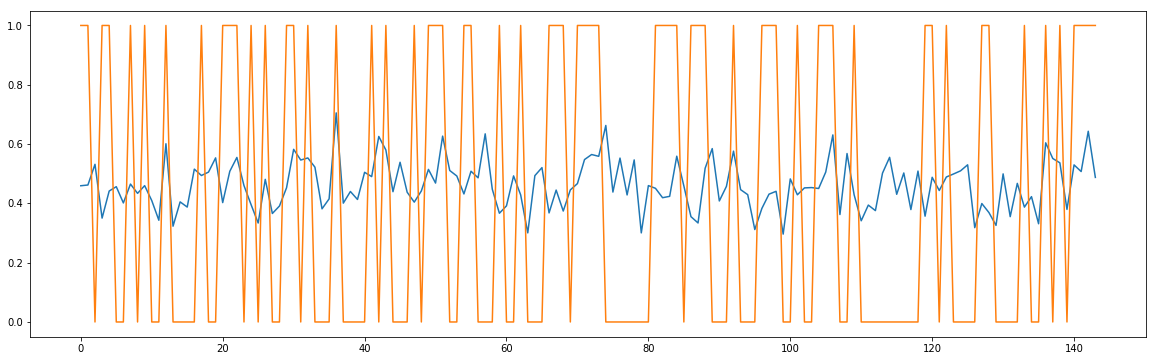

In [128]:
plt.figure(figsize=(20, 6))
plt.plot(p)
plt.plot(y)

#### The above graph (orange part) is different from the one below because the above graph is from shuffled dataset. We don't want to use shuffled dataset

In [129]:
human_proteins = extract_data_from_pdb('d3')

In [133]:
df = human_proteins[0]
df2 = df.drop(['acids'], axis=1)
hot_encode = pd.get_dummies(df['acid_num'], dtype=float)
hot_encode = hot_encode.T.reindex([i for i in range(0, 20)]).T.fillna(0)
df2 = df2.drop(['acid_num'], axis=1)
df2 = pd.concat([df2, hot_encode], axis=1)
#     df2_list.append(df2)
df2.head()

,helix,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
X = []
Y = []

df = df2
for i in range(0, len(df)-9):
    ip = df[i:i+10]
    label = ip['helix']
    input_vector = ip.drop(['helix'], axis=1)
    flattened_ip_vector = input_vector.values.flatten()
    X.append(flattened_ip_vector)
    Y.append(label.values)

X = np.array(X)
Y = np.array(Y)

In [135]:
predictions2 = model.predict(X)

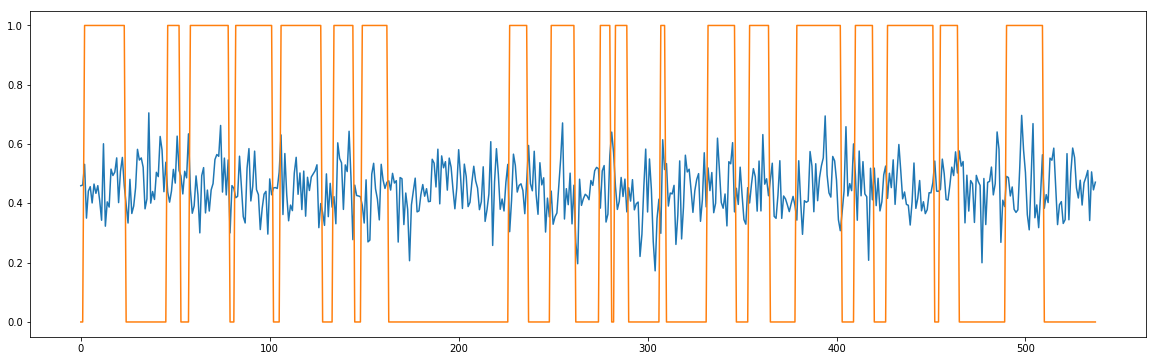

In [136]:
p = []
y = []
for i in range(0, len(df2)-9):
    p.append(predictions[i][5])
    y.append(Y[i][5])
    
plt.figure(figsize=(20, 6))
plt.plot(p)
plt.plot(y)